In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The dataset was taken from kaggle. The link is : https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

### Dataset Source & Context

The dataset contains used vehicle listings collected from Craigslist, representing real-world marketplace pricing data.

### Problem Statement

Predict the resale price of used vehicles based on vehicle attributes such as year, condition, fuel type, and mileage.

### Business Relevance

Accurate price prediction helps dealerships, e-commerce platforms, and consumers determine fair vehicle valuation.

In [2]:
df=pd.read_csv("/content/new_vehicle_dataset.csv")

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
1,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
2,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500
3,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.0,bmw,328i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.3203,-80.6250,2021-04-25T23:53:42-0400
4,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.7839,-123.0529,2021-05-01T10:04:24-0700


In [4]:
df.shape

(20000, 26)

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20000 non-null  int64  
 1   url           20000 non-null  object 
 2   region        20000 non-null  object 
 3   region_url    20000 non-null  object 
 4   price         20000 non-null  int64  
 5   year          19941 non-null  float64
 6   manufacturer  19181 non-null  object 
 7   model         19752 non-null  object 
 8   condition     11932 non-null  object 
 9   cylinders     11756 non-null  object 
 10  fuel          19844 non-null  object 
 11  odometer      19807 non-null  float64
 12  title_status  19592 non-null  object 
 13  transmission  19888 non-null  object 
 14  VIN           12354 non-null  object 
 15  drive         13995 non-null  object 
 16  size          5723 non-null   object 
 17  type          15756 non-null  object 
 18  paint_color   13974 non-nu

Remove unnecessary columns for modeling clarity.

In [7]:
columns_needed = [
    "price", "year", "manufacturer", "model",
    "condition", "cylinders", "fuel",
    "odometer", "transmission", "drive",
    "type", "paint_color"
]

df = df[columns_needed]

In [8]:
print("Shape:", df.shape)

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (20000, 12)

Data Types:

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
dtype: object

Missing Values:

price              0
year              59
manufacturer     819
model            248
condition       8068
cylinders       8244
fuel             156
odometer         193
transmission     112
drive           6005
type            4244
paint_color     6026
dtype: int64

Duplicate Rows: 2070


Price represents the resale value of a vehicle and is the primary business outcome to predict.

In [9]:
print(df["price"].describe())


count    2.000000e+04
mean     1.899143e+04
std      1.780965e+05
min      0.000000e+00
25%      5.950000e+03
50%      1.398600e+04
75%      2.659000e+04
max      2.500300e+07
Name: price, dtype: float64


In [10]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)


Numerical: ['price', 'year', 'odometer']
Categorical: ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']


In [11]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


Median is robust for price and odometer

Mode preserves categorical distribution

In [12]:
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

df = df.drop_duplicates()


Duplicates: 2073


Duplicate listings can bias price prediction.

In [13]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[column] < lower) | (data[column] > upper)]

outliers = detect_outliers_iqr(df, "price")
print("Outliers detected:", len(outliers))


Outliers detected: 445


In [15]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))

outlier_rows = np.where(z_scores > 3)[0]

print("Z-score outliers:", len(outlier_rows))


Z-score outliers: 454


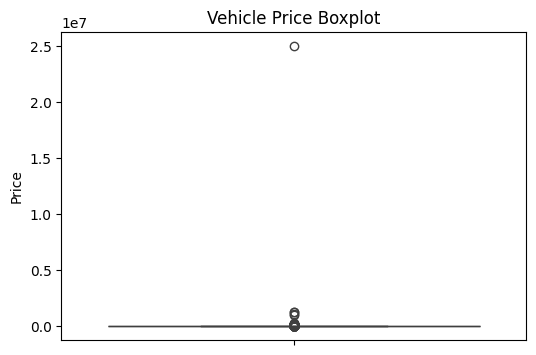

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["price"])
plt.title("Vehicle Price Boxplot")
plt.ylabel("Price")
plt.show()


In [17]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[column] = np.clip(data[column], lower, upper)

for col in numerical_cols:
    cap_outliers(df, col)


Extreme prices may represent rare luxury vehicles; capping reduces skew without losing data.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


We use Label Encoding for simplicity.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop("price", axis=1)
y = df["price"]

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


Scaling improves performance of regression algorithms sensitive to magnitude.

### EDA

Price Distribution : Shows skewness in vehicle pricing.

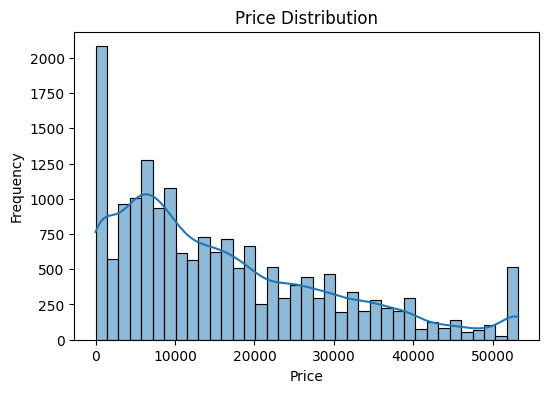

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Correlation Heatmap

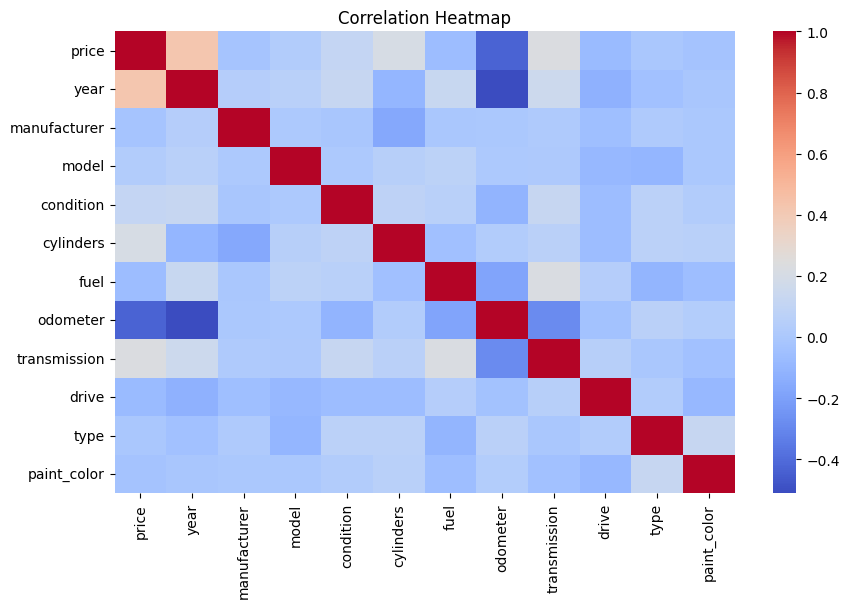

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Feature vs Target : Higher mileage usually reduces price.

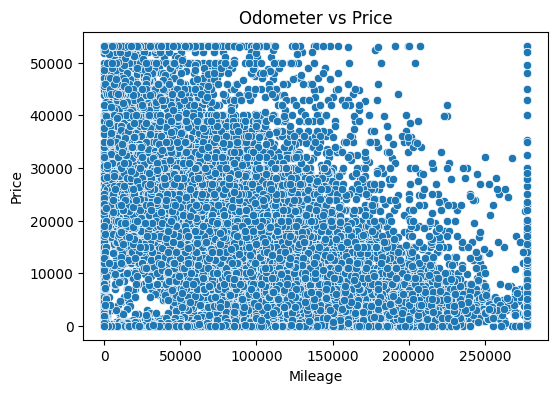

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="odometer", y="price", data=df)
plt.title("Odometer vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


Count Plot for fuel type of vehicles

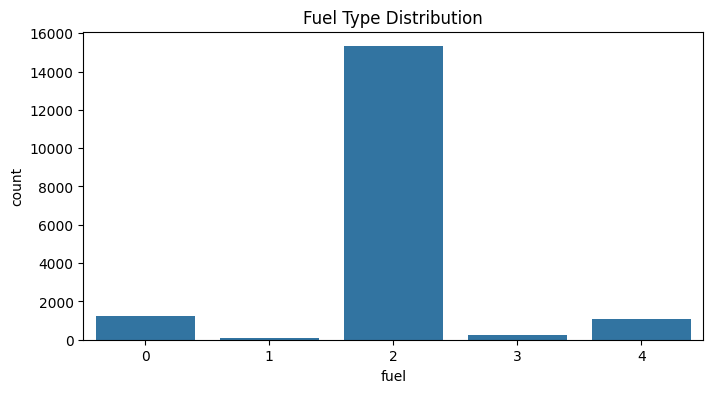

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x="fuel", data=df)
plt.title("Fuel Type Distribution")
plt.show()


Grouped Aggregation by manafacturer

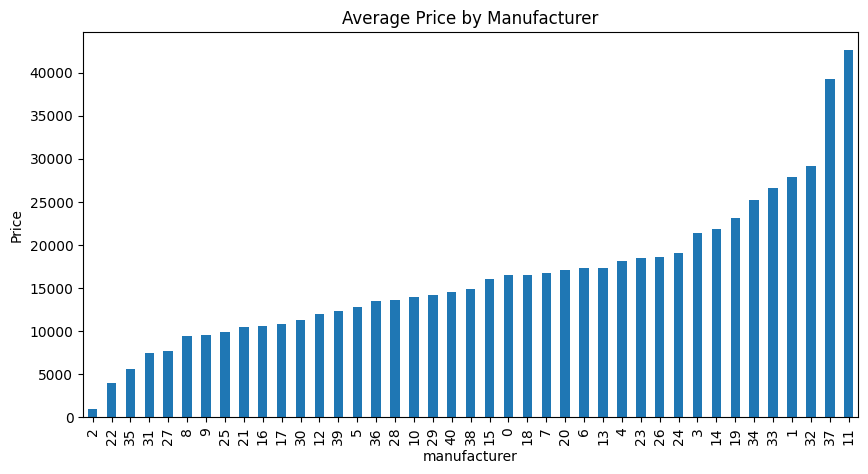

In [25]:
manufacturer_price = df.groupby("manufacturer")["price"].mean()

manufacturer_price.sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Price by Manufacturer")
plt.ylabel("Price")
plt.show()


Boxplot Outlier Visualization

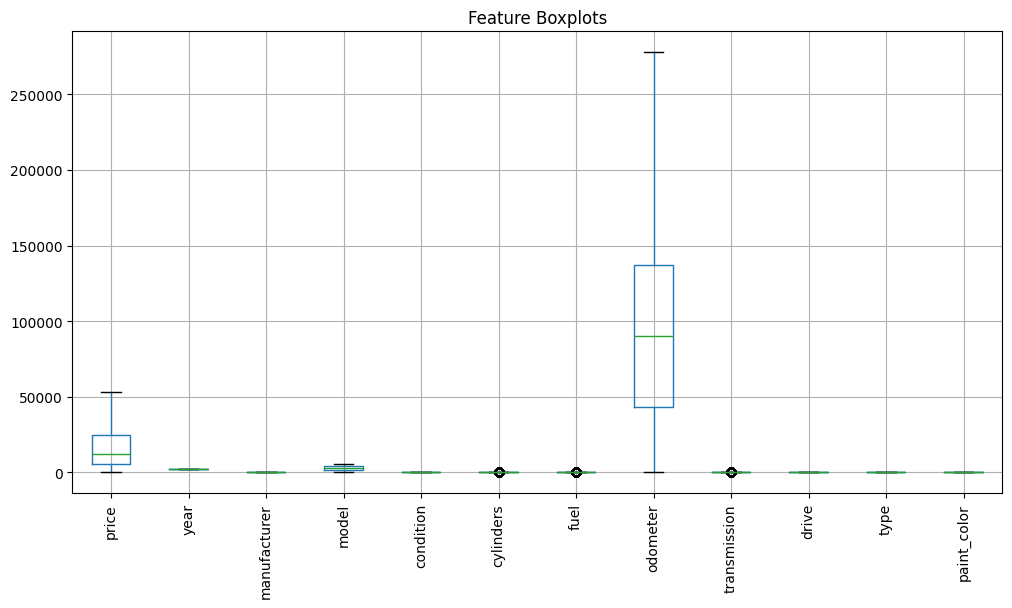

In [26]:
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Feature Boxplots")
plt.show()


### Model Building

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression RMSE: 11109.644434225778
R2 Score: 0.3471021824593016


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Random Forest RMSE: 9396.051151731728
R2 Score: 0.5329798245535919


Feature Importance

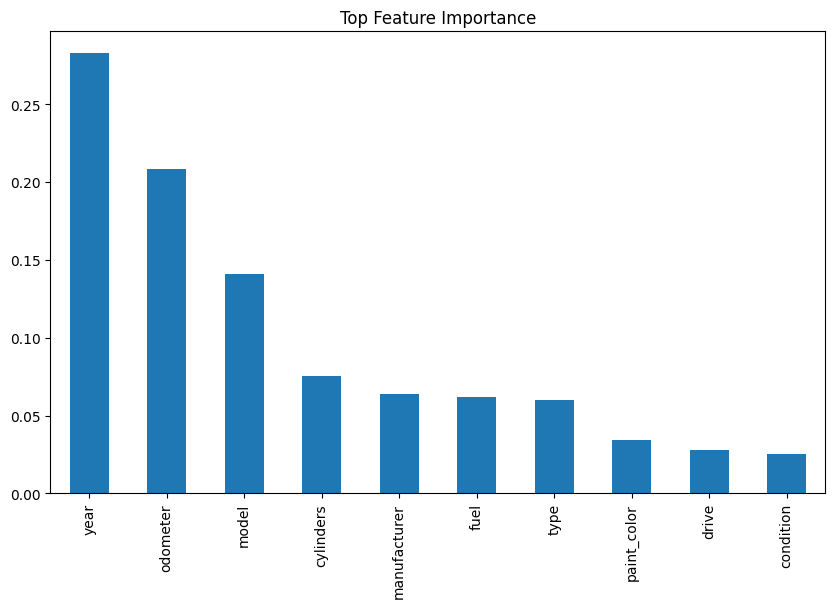

In [33]:
importance = rf.feature_importances_

feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind="bar")
plt.title("Top Feature Importance")
plt.show()


Feature Engineering

In [34]:
df["vehicle_age"] = 2024 - df["year"]
df["mileage_per_year"] = df["odometer"] / df["vehicle_age"]